In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfnyc = pd.read_csv('../files/rent/nyc.csv')


In [6]:
dfnyc = dfnyc.drop(columns=['id','host_id','host_name','last_review','reviews_per_month','availability_365'], axis=1)

In [7]:
dfnyc.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [25]:
dfnyc = dfnyc[dfnyc['price'] < 2000 ]

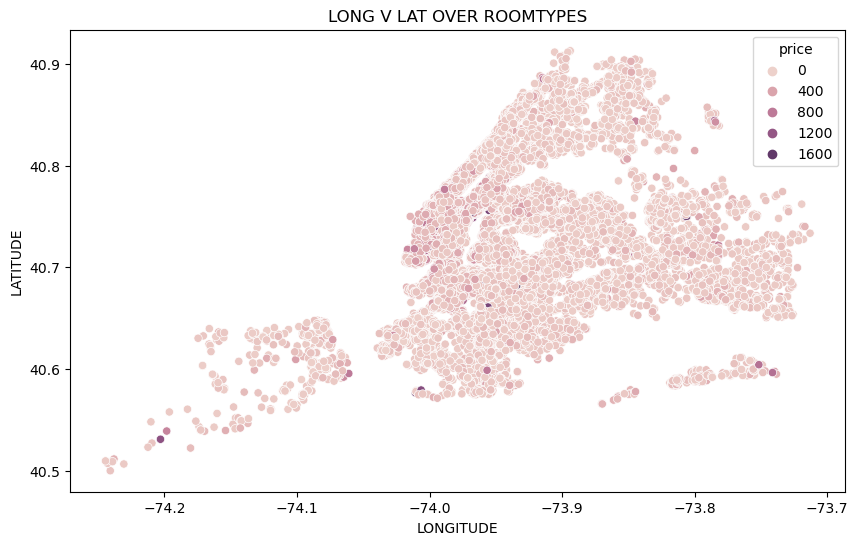

In [27]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data= dfnyc, x= 'longitude', y= 'latitude', hue= 'price')
plt.title('LONG V LAT OVER ROOMTYPES')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()



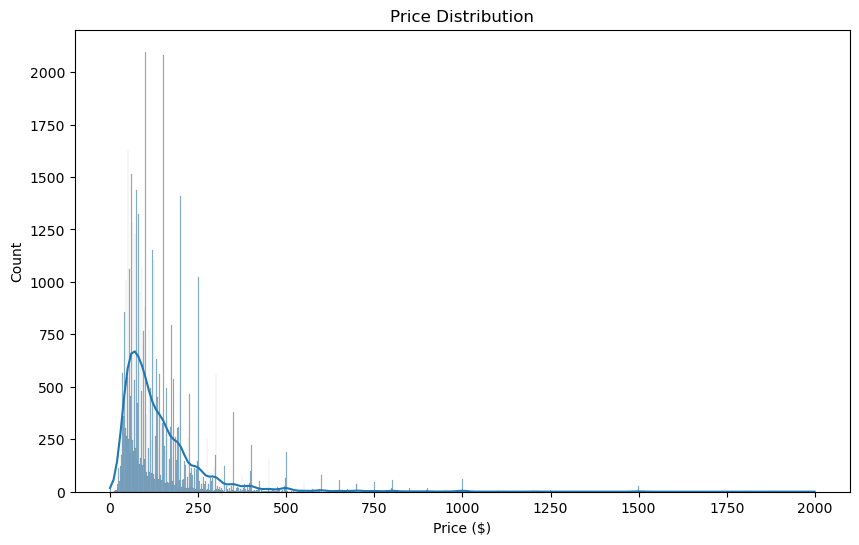

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(dfnyc['price'], bins=1000, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()

In [36]:
dfnyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48785 non-null  object 
 1   neighbourhood_group             48785 non-null  int32  
 2   neighbourhood                   48785 non-null  object 
 3   latitude                        48785 non-null  float64
 4   longitude                       48785 non-null  float64
 5   room_type                       48785 non-null  int32  
 6   price                           48785 non-null  int64  
 7   minimum_nights                  48785 non-null  int64  
 8   number_of_reviews               48785 non-null  int64  
 9   calculated_host_listings_count  48785 non-null  int64  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 3.7+ MB


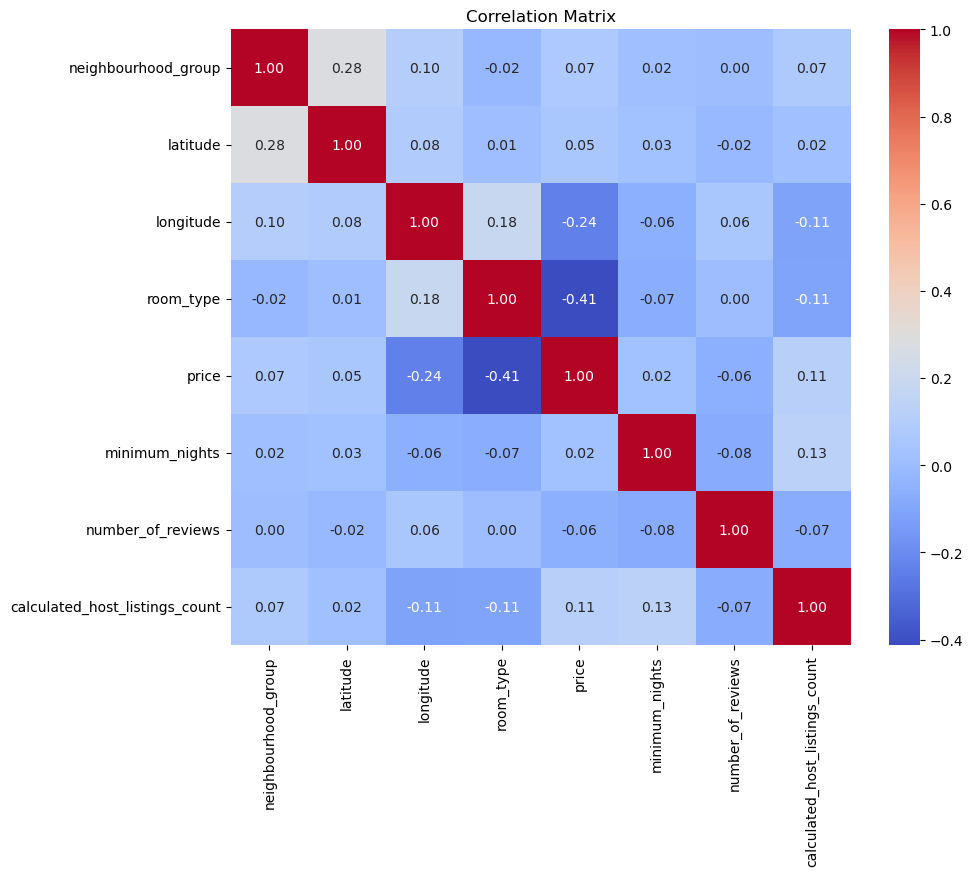

In [37]:
# Select only numerical columns
numeric_cols = dfnyc.select_dtypes(include=['float64', 'int64', 'Int32'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
dfnyc['neighbourhood_group'] = encode.fit_transform(dfnyc['neighbourhood_group'])
dfnyc['room_type'] = encode.fit_transform(dfnyc['room_type'])



In [34]:
dfnyc.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Clean & quiet apt home by the park,1,Kensington,40.64749,-73.97237,1,149,1,9,6
1,Skylit Midtown Castle,2,Midtown,40.75362,-73.98377,0,225,1,45,2
2,THE VILLAGE OF HARLEM....NEW YORK !,2,Harlem,40.80902,-73.94190,1,150,3,0,1
3,Cozy Entire Floor of Brownstone,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,1
4,Entire Apt: Spacious Studio/Loft by central park,2,East Harlem,40.79851,-73.94399,0,80,10,9,1


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Drop rows with missing price
df = dfnyc[dfnyc['price'] < 1000]  # Remove outlier

# Optional: drop text column 'name'
df = df.drop(columns=['name', 'neighbourhood'])  # 'neighbourhood' too granular

# Features and target
X = df.drop(columns=['price'])
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"🎯 MAE: ${mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")



🎯 MAE: $48.66
📊 R² Score: 0.4148


In [39]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model.fit(X_train, y_train_log)
preds_log = model.predict(X_test)
preds = np.expm1(preds_log)

mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"🎯 MAE (after log fix): ${mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")


🎯 MAE (after log fix): $45.47
📊 R² Score: 0.3903


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 🔄 Load your DataFrame (replace this with your own CSV or source)
df = dfnyc.copy()

# 🔍 STEP 1: Data Cleaning
df = df[df['price'] < 1000]                         # Remove outliers
df = df[df['number_of_reviews'] > 2]                # Remove low-review listings
df = df[df['minimum_nights'] < 30]                  # Remove long stays

# 🧠 STEP 2: Feature Engineering
df['price_per_guest'] = df['price'] / df['minimum_nights'].replace(0, 1)
df['reviews_log'] = np.log1p(df['number_of_reviews'])
df['lat_bucket'] = pd.cut(df['latitude'], bins=5, labels=False)
df['lon_bucket'] = pd.cut(df['longitude'], bins=5, labels=False)
df['geo_bucket'] = df['lat_bucket'] * 5 + df['lon_bucket']

# 🧼 STEP 3: Drop Irrelevant Columns
df = df.drop(columns=['name', 'neighbourhood'])  # These don’t help

# 🎨 STEP 4: One-Hot Encoding
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group', 'geo_bucket'], drop_first=True)

# 🧪 STEP 5: Features + Target
target = df['price']
features = df.drop(columns=['price'])  # Everything else is a feature

# 🎯 STEP 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 🔄 STEP 7: Log Transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 🌲 STEP 8: Model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train_log)

# 📈 STEP 9: Predict and Evaluate
predictions_log = model.predict(X_test)
preds = np.expm1(predictions_log)

mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"🎯 Final MAE: ${mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")


🎯 Final MAE: $1.47
📊 R² Score: 0.9921


In [42]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_per_guest,reviews_log,lat_bucket,lon_bucket,...,geo_bucket_9,geo_bucket_12,geo_bucket_13,geo_bucket_14,geo_bucket_17,geo_bucket_18,geo_bucket_19,geo_bucket_22,geo_bucket_23,geo_bucket_24
0,40.64749,-73.97237,149,1,9,6,149.000000,2.302585,1,2,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,225,1,45,2,225.000000,3.828641,3,2,...,0,0,0,0,1,0,0,0,0,0
3,40.68514,-73.95976,89,1,270,1,89.000000,5.602119,2,2,...,0,1,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,1,8.000000,2.302585,3,2,...,0,0,0,0,1,0,0,0,0,0
5,40.74767,-73.97500,200,3,74,1,66.666667,4.317488,2,2,...,0,1,0,0,0,0,0,0,0,0


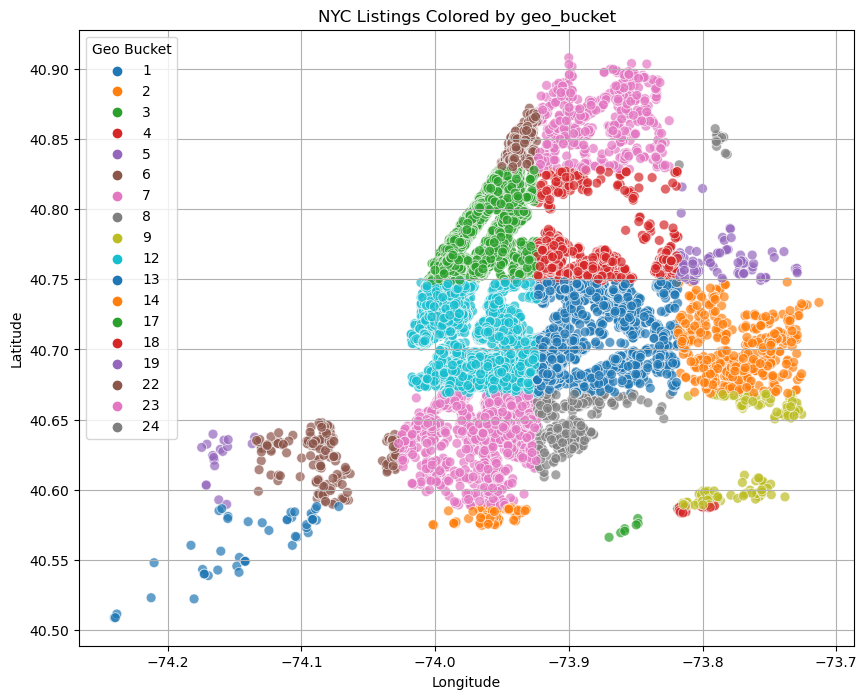

In [47]:
# Reconstruct the original 'geo_bucket' from one-hot encoded columns
geo_columns = [col for col in df.columns if col.startswith('geo_bucket_')]

# Create a new column 'geo_bucket_original' from one-hot encoding
df['geo_bucket_original'] = df[geo_columns].idxmax(axis=1).str.replace('geo_bucket_', '').astype(int)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='geo_bucket_original',
    palette='tab10',
    s=50,
    alpha=0.7
)
plt.title('NYC Listings Colored by geo_bucket')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Geo Bucket')
plt.grid(True)
plt.show()


In [50]:
import joblib

joblib.dump(model, 'model_nyc.pkl')

['model_nyc.pkl']